<h1><center>Knowledge Graph Construction</center></h1>

<b>Un graphe de connaissances est une mani√®re de stocker des donn√©es issues d'une t√¢che d'extraction d'informations. De nombreuses impl√©mentations de base des graphes de connaissances utilisent un concept appel√© triplet, qui est un ensemble de trois √©l√©ments (un sujet, un pr√©dicat et un objet) permettant de stocker des informations sur quelque chose.

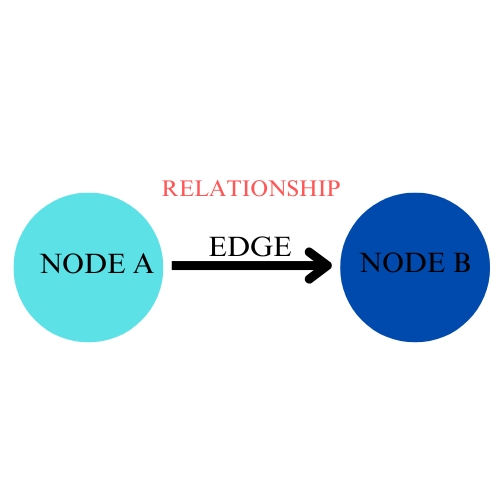

<B>Le n≈ìud A et le n≈ìud B sont ici deux entit√©s diff√©rentes. Ces n≈ìuds sont reli√©s par une ar√™te qui repr√©sente la relation entre les deux n≈ìuds. Il s'agit du plus petit graphe de connaissances que nous pouvons construire ‚Äì √©galement connu sous le nom de triplet. Les graphes de connaissances existent sous diverses formes et tailles.

**Importer les biblioth√®ques n√©cessaires**

In [4]:
import spacy
import numpy as np
import pandas as pd
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
from spacy.tokens import Span
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

**Lire et afficher les cinq premi√®res lignes.**

In [5]:
data=pd.read_csv("comment.csv")
data.head()

Post_Title      Post_Author  \
0  An Islamic Caliphate in the modern era ?   Capitaine_snake   
1  An Islamic Caliphate in the modern era ?   Capitaine_snake   
2  An Islamic Caliphate in the modern era ?   Capitaine_snake   
3  An Islamic Caliphate in the modern era ?   Capitaine_snake   
4  An Islamic Caliphate in the modern era ?   Capitaine_snake   

                                                                                                                                                                                                  Post_URL  \
0  https://www.reddit.com/r/MuslimLounge/comments/1gjoii4/an_islamic_caliphate_in_the_modern_era/?tl=fr#:~:text=Un%20califat%20islamique%20n'est,%C3%AAtre%20directement%20int%C3%A9gr%C3%A9s%20au%20go...   
1  https://www.reddit.com/r/MuslimLounge/comments/1gjoii4/an_islamic_caliphate_in_the_modern_era/?tl=fr#:~:text=Un%20califat%20islamique%20n'est,%C3%AAtre%20directement%20int%C3%A9gr%C3%A9s%20au%20go...   
2  https://www.reddit.com/r/MuslimLounge/comments/1gjoii4/an_islamic_caliphate_in_the_modern_era/?tl=fr#:~:text=Un%20califat%20islamique%20n'est,%C3%AAtre%20directement%20int%C3%A9gr%C3%A9s%20au%20go...   
3  https://www.reddit.com/r/MuslimLounge/comments/1gjoii4/an_islamic_caliphate_in_the_modern_era/?tl=fr#:~:text=Un%20califat%20islamique%20n'est,%C3%AAtre%20directement%20int%C3%A9gr%C3%A9s%20au%20go...   
4  https://www.reddit.com/r/MuslimLounge/comments/1gjoii4/an_islamic_caliphate_in_the_modern_era/?tl=fr#:~:text=Un%20califat%20islamique%20n'est,%C3%AAtre%20directement%20int%C3%A9gr%C3%A9s%20au%20go...   

         Comment_Author  \
0           _Huge_Bush_   
1      Chickenburger287   
2          ancalagonxii   
3             samven582   
4  Adventurous-Cash2044   

                                                                                                                                                                                              Comment_Body  \
0  Definitely don‚Äôt trust the Hadith if it is not sahih. \n\nAs for a Caliphate in the modern era, it‚Äôs definitely possible if Muslims finally wake up. I personally don‚Äôt see it happening until Allah...   
1                                        Too much evidence says it will happen. A common misconception and a cop out is also that it'll only happen after imam Mahdi but the evidence indicates otherwise.   
2  \nThis is a weak hadith because it is mursal (disconnected). Yunus bin Maysarah bin Halbas, who narrated the hadith from the Prophet Ô∑∫, though a trustworthy; however, he is from the Tabi‚Äòun, and t...   
3                                                                                                                                                                                     We need a federation   
4                                                                                                                                                                                 Can you cite the Hadith?   

   Comment_Score  
0             14  
1              5  
2              4  
3              3  
4              2

**Conserver la colonne qui contient les commentaires.**

In [6]:
dataset=data[['Comment_Author', 'Comment_Body']]

In [7]:
d_comment=dataset.dropna()
d_commentaire=pd.DataFrame(d_comment)
d_commentaire

Comment_Author  \
0              _Huge_Bush_   
1         Chickenburger287   
2             ancalagonxii   
3                samven582   
4     Adventurous-Cash2044   
...                    ...   
3486               makochi   
3487  TheNewPoetLawyerette   
3491              IBiteYou   
3492              IBiteYou   
3495         Sweaty-Budget   

                                                                                                                                                                                                 Comment_Body  
0     Definitely don‚Äôt trust the Hadith if it is not sahih. \n\nAs for a Caliphate in the modern era, it‚Äôs definitely possible if Muslims finally wake up. I personally don‚Äôt see it happening until Allah...  
1                                           Too much evidence says it will happen. A common misconception and a cop out is also that it'll only happen after imam Mahdi but the evidence indicates otherwise.  
2     \nThis is a weak hadith because it is mursal (disconnected). Yunus bin Maysarah bin Halbas, who narrated the hadith from the Prophet Ô∑∫, though a trustworthy; however, he is from the Tabi‚Äòun, and t...  
3                                                                                                                                                                                        We need a federation  
4                                                                                                                                                                                    Can you cite the Hadith?  
...                                                                                                                                                                                                       ...  
3486  [From the facebook of the man in question](https://archive.fo/d6353):\n\n>Here is the truth about the knife, yes I had a knife in my pocket at the rally, I did not brandish it until I was leaving ...  
3487  Your "I can choose to ignore hate speech" example sidesteps Spez's example of how allowing hate speech at all suppresses speech from minorities that you keep bringing up, and my point that white s...  
3491                                                                                                                                         Well, who ARE these people saying this?  I'd love to address it.  
3492  I don't think that Facebook entry helps your case that he was some KKK guy.\n\n> and brandished it people as a show of force against "radical muslims," \n\nWho wanted the statue down because they ...  
3495                                                                                                multiple people all across reddit, I'd ping you when it happens but you're likely to report for ping spam  

[2998 rows x 2 columns]

<b>Extraction des entit√©s</b>


In [8]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################
    return [ent1.strip(), ent2.strip()]


<b>Relations Extraction

In [9]:
def get_relation(sent):
    # Analyser la phrase avec SpaCy
    doc = nlp(sent)

    # Cr√©er un objet Matcher
    matcher = Matcher(nlp.vocab)

    # D√©finir un motif pour la relation
    pattern = [
        {'DEP': 'ROOT'},
        {'DEP': 'prep', 'OP': "?"},  # pr√©position optionnelle
        {'DEP': 'agent', 'OP': "?"},  # agent optionnel
        {'POS': 'ADJ', 'OP': "?"}    # adjectif optionnel
    ]

    # Ajouter le motif au matcher
    matcher.add("matching_1", [pattern])  # Passer la liste de motifs directement

    # Trouver les correspondances
    matches = matcher(doc)

    if not matches:
        return "Aucune correspondance trouv√©e"

    # R√©cup√©rer la derni√®re correspondance
    k = len(matches) - 1

    # Extraire le texte correspondant √† la correspondance
    span = doc[matches[k][1]:matches[k][2]]

    return span.text

In [10]:
entity_pairs = []

# Parcours des commentaires
for i in tqdm(range(len(d_commentaire))):
    # Extraire l'auteur et le corps du commentaire
    author = d_commentaire['Comment_Author'].iloc[i]
    comment = d_commentaire['Comment_Body'].iloc[i]

    # Extraire les entit√©s du commentaire
    entities = get_entities(comment)  # Vous devez d√©finir cette fonction
    relation = get_relation(comment)

    # Ajouter l'auteur et les entit√©s √† la liste
    entity_pairs.append((author, entities,relation))

# Afficher les premi√®res paires d'entit√©s extraites
print(entity_pairs[:5])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2998/2998 [01:47<00:00, 27.93it/s]

[('_Huge_Bush_', ['around  what', 'time'], 'see'), ('Chickenburger287', ['only imam evidence', 'only imam Mahdi'], 'is'), ('ancalagonxii', ['well  Islam', '_'], 'QA](https://islamqa.info'), ('samven582', ['We', 'federation'], 'need'), ('Adventurous-Cash2044', ['you', 'Hadith'], 'cite')]


In [11]:
print(entity_pairs[:10])

[('_Huge_Bush_', ['around  what', 'time'], 'see'), ('Chickenburger287', ['only imam evidence', 'only imam Mahdi'], 'is'), ('ancalagonxii', ['well  Islam', '_'], 'QA](https://islamqa.info'), ('samven582', ['We', 'federation'], 'need'), ('Adventurous-Cash2044', ['you', 'Hadith'], 'cite'), ('Mission_Article483', ['caliphate', 'Jerusalem'], 'are sahih'), ('yasinburak15', ['modern  caliphate', 'Muslim  nations'], 'needs'), ('Capitaine_snake', ['guided  we', 'matter'], 'were'), ('Capitaine_snake', ['mahdi', 'established  Caliphate'], 'suppose'), ('Capitaine_snake', ['I', 'thanks clarification brother'], 'know')]


In [12]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

relation = [i[2] for i in entity_pairs]
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relation})

In [13]:
kg_df.dropna()

source                                 target  \
0              _Huge_Bush_                   [around  what, time]   
1         Chickenburger287  [only imam evidence, only imam Mahdi]   
2             ancalagonxii                       [well  Islam, _]   
3                samven582                       [We, federation]   
4     Adventurous-Cash2044                          [you, Hadith]   
...                    ...                                    ...   
2993               makochi                       [i, good  faith]   
2994  TheNewPoetLawyerette                [black  people, nature]   
2995              IBiteYou                                [I, it]   
2996              IBiteYou                           [so  we, it]   
2997         Sweaty-Budget                       [you, ping spam]   

                          edge  
0                          see  
1                           is  
2     QA](https://islamqa.info  
3                         need  
4                         cite  
...                        ...  
2993                      know  
2994                        's  
2995                      love  
2996                        's  
2997                      ping  

[2998 rows x 3 columns]

In [14]:
entity_pairs[1][2]

'is'

In [15]:
# V√©rifier les types dans les colonnes 'source' et 'target'
print(kg_df["source"].apply(type).value_counts())
print(kg_df["target"].apply(type).value_counts())

# Si des listes sont pr√©sentes, les convertir en cha√Ænes de caract√®res
kg_df["source"] = kg_df["source"].apply(lambda x: str(x) if isinstance(x, list) else x)
kg_df["target"] = kg_df["target"].apply(lambda x: str(x) if isinstance(x, list) else x)

# Ensuite, recr√©er le graphe
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())


source
<class 'str'>    2998
Name: count, dtype: int64
target
<class 'list'>    2998
Name: count, dtype: int64


<h1>Build Knowledge Graph

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


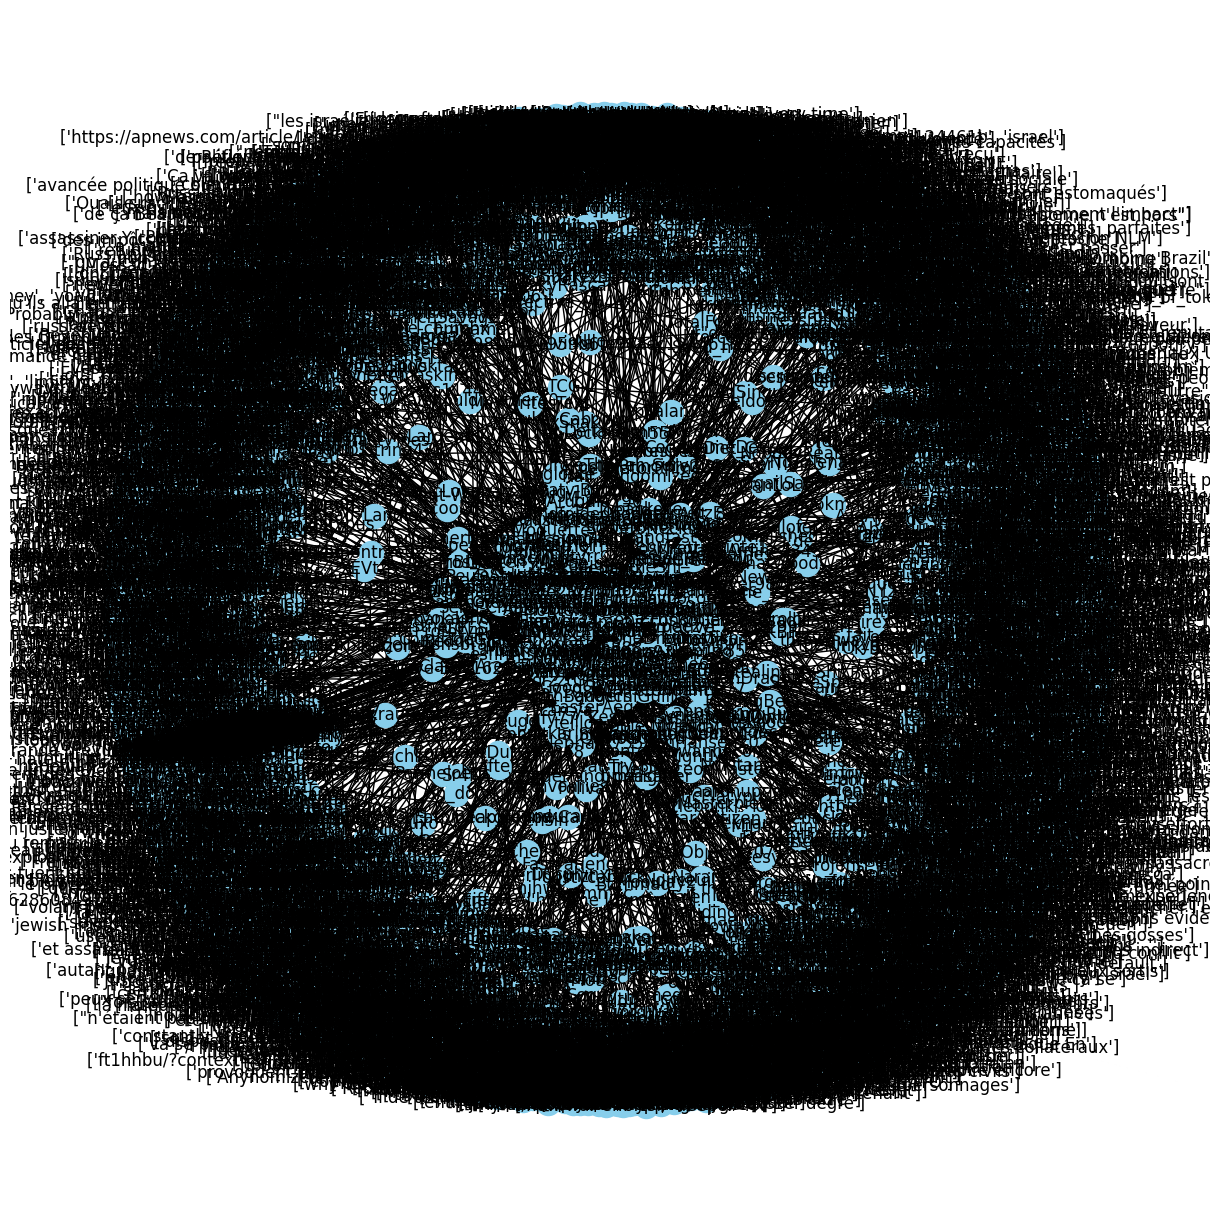

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

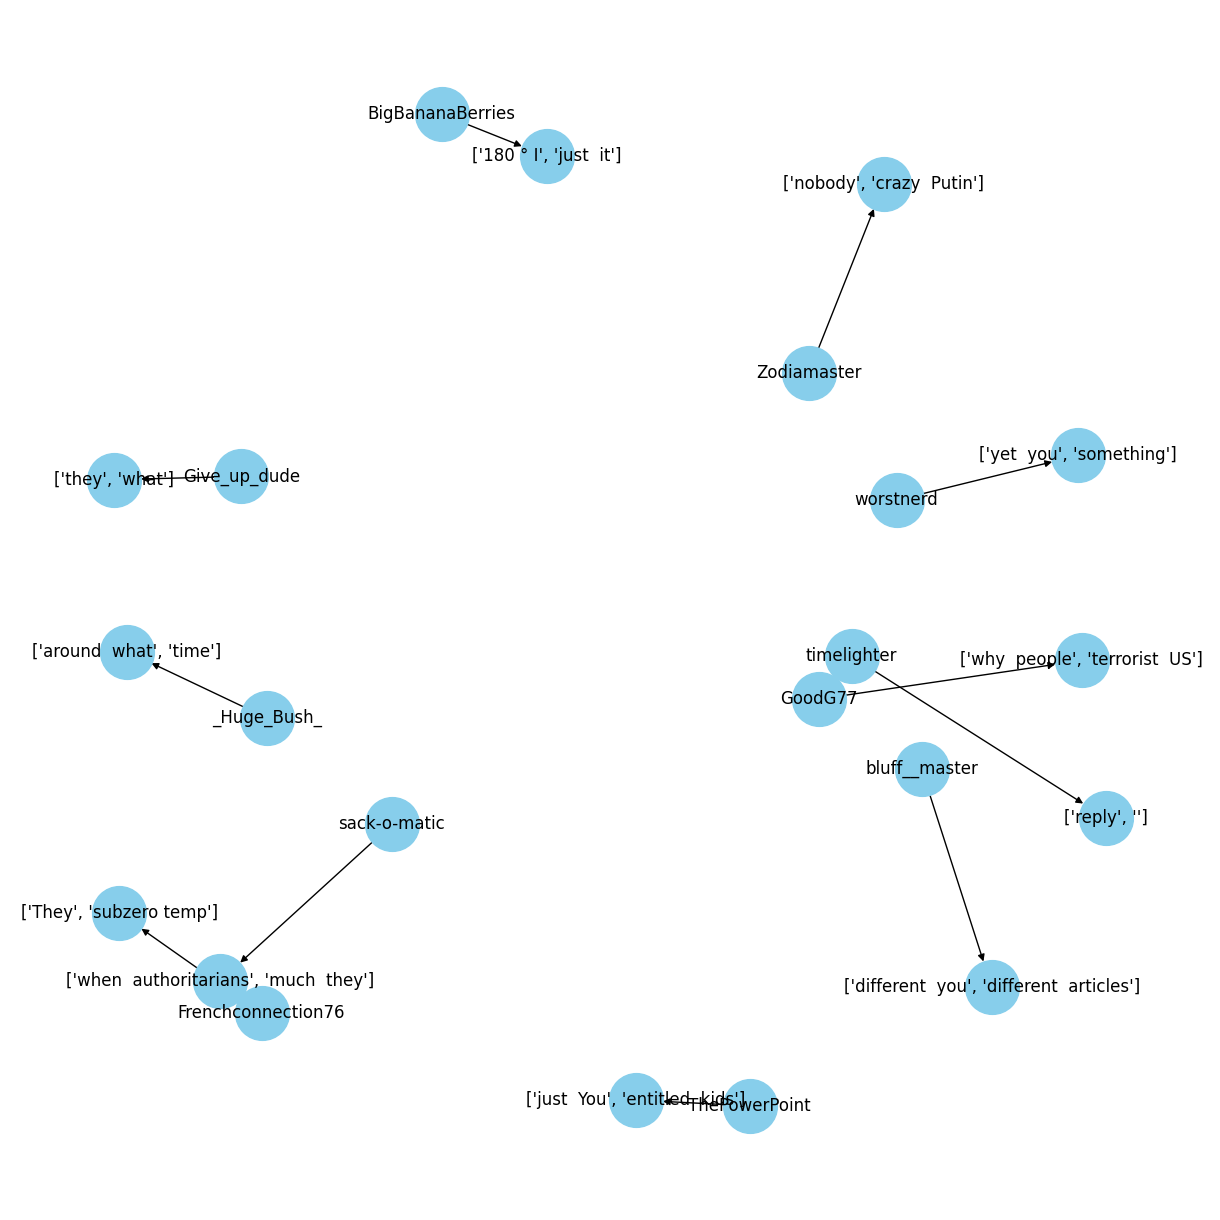

In [17]:
Ga=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="see"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(Ga, k = 0.5) # k regulates the distance between nodes
nx.draw(Ga, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

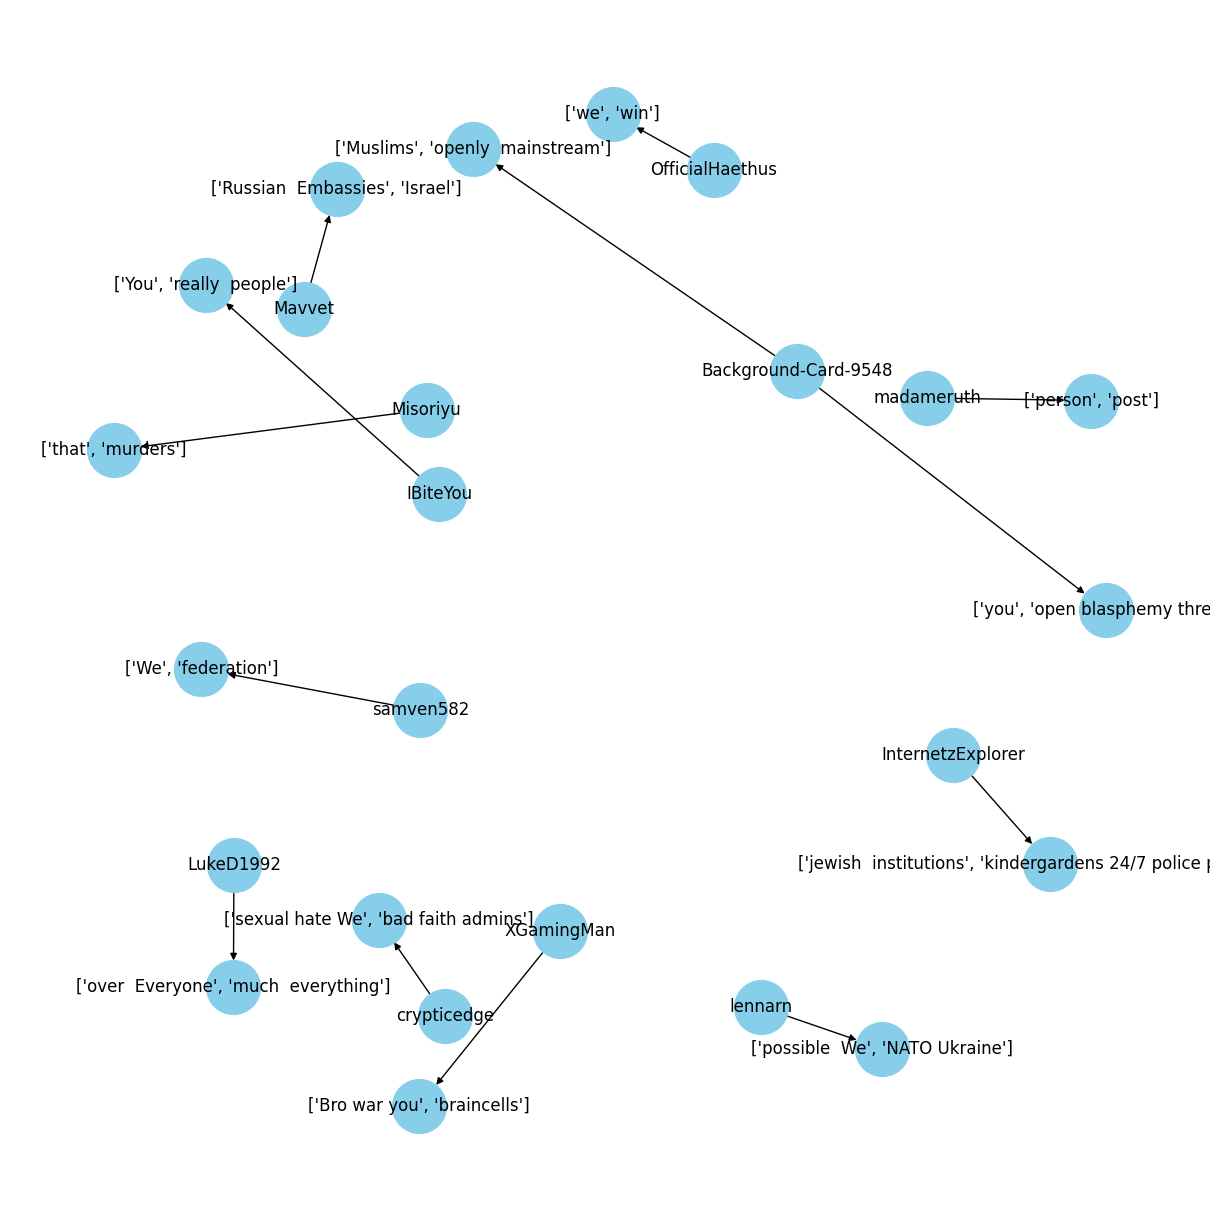

In [18]:
Gn=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="need"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(Gn, k = 0.5) # k regulates the distance between nodes
nx.draw(Gn, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

<h1>Mesures de Centralit√©</h1>

**1. Centralit√© de Degr√©**

In [19]:
degree_centrality = nx.degree_centrality(G)
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1],reverse=True)
print("Top 5 noeuds par centralit√© de degr√© :", sorted_nodes[:5])

Top 5 noeuds par centralit√© de degr√© : [("['', '']", 0.06349589570255915), ('TheNewPoetLawyerette', 0.01110574601641719), ('IBiteYou', 0.010140028971511346), ('aasfourasfar', 0.008932882665379043), ('PsyX99', 0.007242877836793819)]


<b>Interpr√©tation</b>

<b>1. **["", ""]** :</b> Ce n≈ìud semble √™tre une valeur vide ou mal format√©e, ce qui pourrait indiquer une anomalie ou une absence de donn√©es.<br>
<b>2. **TheNewPoetLawyerette** :</b> C'est un n≈ìud qui a une centralit√© de degr√© relativement √©lev√©e, ce qui signifie qu'il est connect√© √† plusieurs autres n≈ìuds dans le graphe, sugg√©rant qu'il joue un r√¥le important dans le r√©seau.<br>
<b>3. **IBiteYou** :</b> Ce n≈ìud est √©galement relativement bien connect√©, indiquant qu'il a une certaine influence ou importance dans le contexte des relations analys√©es.<br>
<b>4. **aasfourasfar** : </b>Moins central que les deux pr√©c√©dents, mais il reste un n≈ìud significatif dans le r√©seau avec une centralit√© mod√©r√©e.<br>
<b>5. **PsyX99** :</b> Ce n≈ìud, bien qu'ayant une centralit√© plus faible que les autres, est toujours notable dans le r√©seau pour ses connexions.<br>
<b>
En r√©sum√©, ces n≈ìuds repr√©sentent les entit√©s les plus connect√©es, jouant potentiellement des r√¥les influents ou centraux dans le graphe de connaissances que vous avez construit.</b>

<b>2. Centralit√© d'Interm√©diarit√© (Betweenness)

In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
print("Top 5 n≈ìuds par centralit√© d'interm√©diarit√© :", sorted_betweenness[:5])

Top 5 n≈ìuds par centralit√© d'interm√©diarit√© : [('_Huge_Bush_', 0.0), ("['around  what', 'time']", 0.0), ('Chickenburger287', 0.0), ("['only imam evidence', 'only imam Mahdi']", 0.0), ('ancalagonxii', 0.0)]


<b>Interpr√©tation</b>

<b>L'interpr√©tation des cinq premiers n≈ìuds par centralit√© d'interm√©diarit√© montre que ces n≈ìuds ne jouent aucun r√¥le d'interm√©diaire dans le graphe, c'est-√†-dire qu'ils n'agissent pas comme des "ponts" entre d'autres n≈ìuds

<b>3. Centralit√© de Proximit√© (Closeness)

In [21]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1],reverse=True)
print("Top 5 n≈ìuds par centralit√© de proximit√© :", sorted_closeness[:5])

Top 5 n≈ìuds par centralit√© de proximit√© : [("['', '']", 0.0521487204249155), ("['you', '']", 0.0021728633510381457), ("['That', '']", 0.0016900048285852245), ("['you', 'what']", 0.0012071463061323032), ("['they', '']", 0.0012071463061323032)]


<b>Interpr√©tation</b>

<b>
1. **["", ""]** :</b> Ce n≈ìud semble repr√©senter une valeur vide ou mal format√©e, mais malgr√© cela, il a une centralit√© de proximit√© mod√©r√©e (0.052), ce qui sugg√®re qu'il est relativement proche d'autres n≈ìuds, mais son r√¥le dans le r√©seau n'est pas clair en raison de sa forme.<br>

<b>2. **["you", ""]** :</b> Ce n≈ìud a une centralit√© de proximit√© faible (0.002), ce qui signifie qu'il est un peu plus √©loign√© des autres n≈ìuds, mais il reste connect√© √† une partie importante du graphe. Cela pourrait √™tre un n≈ìud qui appara√Æt fr√©quemment dans les interactions mais n'a pas une forte centralit√© par rapport aux autres.<br>
<b>3. **["That", ""]** :</b> De m√™me, ce n≈ìud a une centralit√© faible (0.0017). Il semble jouer un r√¥le marginal mais toujours pr√©sent dans les connexions du graphe.<br>

<b>4. **["you", "what"]** : </b>Ce n≈ìud, avec une centralit√© tr√®s faible (0.0012), est √©galement un n≈ìud isol√©, mais il a un r√¥le dans la structure de proximit√© du graphe, bien qu'il soit √©loign√© des autres.<br>

<b>5. **["they", ""]** :</b> Ce n≈ìud, avec une centralit√© de proximit√© identique √† celle de ["you", "what"] (0.0012), est √©galement un √©l√©ment relativement distant dans le r√©seau, sans √™tre un point cl√© de connexion.

<b>4. Centralit√© de Vecteur Propre (Eigenvector)

In [22]:
# Convertir MultiDiGraph en DiGraph
G_simple = nx.DiGraph(G)
# Calculer la centralit√© du vecteur propre
eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=1000)
# Trier les r√©sultats par centralit√© d√©croissante
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse=True)
# Afficher les 10 premiers n≈ìuds par centralit√© de vecteur propre
print("Top 5 n≈ìuds par centralit√© de vecteur propre :", sorted_eigenvector[:5])

Top 5 n≈ìuds par centralit√© de vecteur propre : [("['', '']", 0.9687418046362366), ("['you', '']", 0.04042838734196678), ("['That', '']", 0.031459175580669504), ("['you', 'what']", 0.02248996381937232), ("['they', '']", 0.02248996381937232)]


<b>Interpr√©tation</b>

1. **["", ""]** : Ce n≈ìud a une centralit√© de vecteur propre tr√®s √©lev√©e (0.968), ce qui sugg√®re qu'il est extr√™mement influent dans le r√©seau, bien qu'il semble √™tre une valeur vide ou mal format√©e. Cela pourrait signifier que ce n≈ìud est tr√®s connect√© √† des n≈ìuds importants dans le r√©seau, bien que sa forme ne soit pas claire.

2. **["you", ""]** : Ce n≈ìud a une centralit√© de vecteur propre relativement faible (0.040), ce qui signifie qu'il est moins influent par rapport aux autres n≈ìuds du r√©seau, mais il reste un n≈ìud significatif qui interagit avec des entit√©s importantes.

3. **["That", ""]** : Ce n≈ìud a une centralit√© mod√©r√©e (0.031), sugg√©rant qu'il joue un r√¥le mod√©r√© dans le r√©seau. Il est connect√© √† certains n≈ìuds influents, mais son impact global est inf√©rieur √† celui de ["", ""] et ["you", ""].

4. **["you", "what"]** : Avec une centralit√© de vecteur propre de 0.022, ce n≈ìud est moins central dans le graphe, indiquant qu'il a moins d'influence. Cependant, il est connect√© √† d'autres n≈ìuds avec un certain niveau d'importance dans le r√©seau.

5. **["they", ""]** : Ce n≈ìud a une centralit√© de vecteur propre identique √† celle de ["you", "what"] (0.022), ce qui signifie qu'il est aussi relativement peu influent, bien qu'il fasse partie de certaines connexions importantes dans le r√©seau.

<b>Calcul de PageRank

In [23]:
pagerank_centrality = nx.pagerank(G, alpha=0.85)
print("PageRank :", pagerank_centrality)

PageRank : {'_Huge_Bush_': 0.0001846794775925407, "['around  what', 'time']": 0.0003422065898219888, 'Chickenburger287': 0.0001846794775925407, "['only imam evidence', 'only imam Mahdi']": 0.00026344303370726477, 'ancalagonxii': 0.0001846794775925407, "['well  Islam', '_']": 0.0003422065898219888, 'samven582': 0.0001846794775925407, "['We', 'federation']": 0.0003422065898219888, 'Adventurous-Cash2044': 0.0001846794775925407, "['you', 'Hadith']": 0.0003422065898219888, 'Mission_Article483': 0.0001846794775925407, "['caliphate', 'Jerusalem']": 0.0003422065898219888, 'yasinburak15': 0.0001846794775925407, "['modern  caliphate', 'Muslim  nations']": 0.0003422065898219888, 'Capitaine_snake': 0.0001846794775925407, "['guided  we', 'matter']": 0.00021618490003843033, "['mahdi', 'established  Caliphate']": 0.00021618490003843033, "['I', 'thanks clarification brother']": 0.00021618490003843033, "['modern nation state interpretation', 'islam']": 0.00021618490003843033, "['Allah', 'world']": 0.00

<h1>Algorithmique de la M√©thode de Louvain</h1>

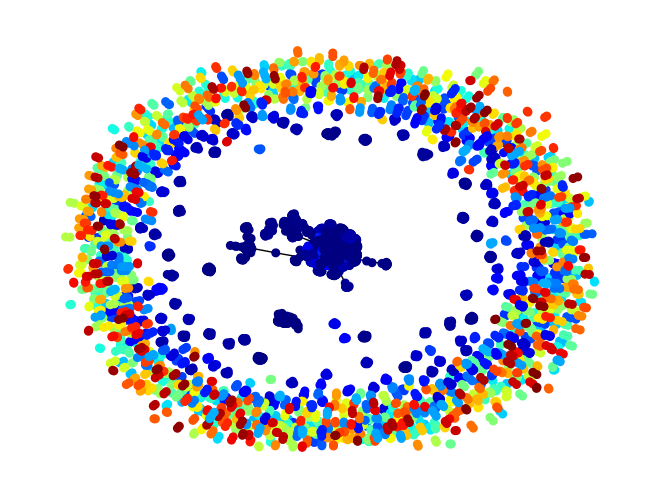

In [28]:
# Convertir en graphe non dirig√© si n√©cessaire
G_undirected = G.to_undirected()

# D√©tection des communaut√©s avec NetworkX
communities = greedy_modularity_communities(G_undirected)

# Cr√©er une partition sous forme de dictionnaire
partition = {node: i for i, community in enumerate(communities) for node in community}

# Visualisation
pos = nx.spring_layout(G_undirected)
nx.draw(
    G_undirected,
    pos,
    node_size=30,
    cmap=plt.cm.jet,
    node_color=[partition[node] for node in G_undirected.nodes],
    edge_cmap=plt.cm.Blues,
    with_labels=False
)
plt.show()

### Interpr√©tation

- **Points color√©s** :  
  Chaque n≈ìud (point) du graphe est color√© selon la communaut√© √† laquelle il appartient. Les couleurs diff√©rentes repr√©sentent les diff√©rentes communaut√©s d√©tect√©es.

- **Disposition** :  
  La disposition est d√©termin√©e par l'algorithme `spring_layout`, qui place les n≈ìuds de mani√®re √† minimiser les chevauchements tout en repr√©sentant les relations dans le graphe (les forces de connexion).

- **Groupements visibles** :  
  - Les n≈ìuds regroup√©s au centre repr√©sentent probablement une communaut√© dense avec beaucoup de connexions internes.  
  - Les n≈ìuds sur les bords sont dispers√©s, formant plusieurs petites communaut√©s ou des sous-structures.

- **R√©partition des communaut√©s** :  
  - Le code utilise la modularit√© pour diviser les n≈ìuds en communaut√©s maximisant la coh√©sion interne des groupes.  
  - Chaque communaut√© est assign√©e √† un index, utilis√© pour la coloration des n≈ìuds.  

In [29]:
communities = greedy_modularity_communities(G)

# Calcul de la modularit√© avec NetworkX
modularity = nx.community.modularity(G, communities)

# Afficher la modularit√©
print(f"Modularit√© de la partition : {modularity}")

Modularit√© de la partition : 0.9645806788692876


<b>En r√©sum√©, une modularit√© de 0.9465 refl√®te une partition de tr√®s bonne qualit√©, o√π les communaut√©s sont distinctes et bien structur√©es